In [1]:
# Package imports
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
from astropy import log
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.K.fits")

In [3]:
# Get only the cubes that have our line of interest in them
mol_tag = 27501
cubes = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

    FREQ     ERR    LGINT   DR  ELO   GUP ...  vu  Jl  Kl  vl  F    name  
    MHz      MHz   MHz nm2     1 / cm     ...                             
----------- ------ ------- --- ------ --- ... --- --- --- --- --- --------
265886.4339 0.0004 -1.1073   2 8.8692  21 ...  --  --  --  --   2 HCN, v=0
   FREQ     ERR    LGINT   DR  ELO   GUP  TAG  ...  vu  Jl  Kl  vl  F    name  
   MHz      MHz   MHz nm2     1 / cm           ...                             
---------- ------ ------- --- ------ --- ----- ... --- --- --- --- --- --------
88631.6022 0.0001  -2.514   2    0.0   9 27501 ...  --  --  --  --   0 HCN, v=0


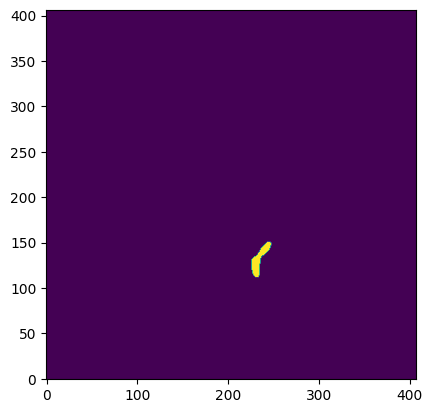

In [4]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=True)

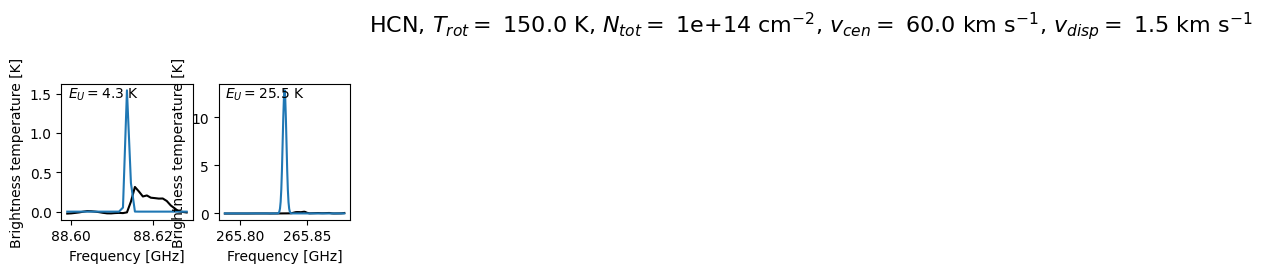

In [6]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 150., N_tot = 1.0e+14, v_cen = 60.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=25, 
               nrows=12, ncols=10, parse_loc=False, line_by_line=True, name_for_plot=f'HCN', extr_type="reg")

In [ ]:
# Set region with diffuse emission
from astropy.io import fits
diffuse_regions = fits.open("diffuse_regions.fits")

diffuse_region_5_mask = diffuse_regions[0].data == 1

import matplotlib.pyplot as plt
plt.imshow(diffuse_region_5_mask, origin="lower")

In [ ]:
from reproject import reproject_interp

cube = cubes[0]
array, footprint = reproject_interp((diffuse_region_5_mask, diffuse_regions[0].header), cube.wcs.celestial, shape_out=(cube.shape[1], cube.shape[2]))
plt.imshow(array==1, origin="lower")

mask = array==1

# Get subcube from the mask
cube_masked = cube.with_mask(mask)

# Extract spectrum from the subcube made from the mask
spectrum = cube_masked.mean(axis=(1,2), how='slice')

In [ ]:
plt.plot(spectrum.spectral_axis, spectrum)